While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you can download from their GitHub repository.

For this project, you'll clean and explore the dataset in Jupyter notebook. To see a sample notebook containing all of the answers, visit the project's GitHub repository.

The following code reads the data into a pandas DataFrame:

import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
We need to specify an encoding, because the dataset has some characters that aren't in Python's default utf-8 encoding. You can read more about character encodings on developer Joel Spolsky's blog.

The data has several columns, including the following:

RespondentID — An anonymized ID for the respondent (person taking the survey)
Gender — the respondent's gender
Age — the respondent's age
Household Income — the respondent's income
Education — the respondent's education level
Location (Census Region) — the respondent's location
Have you seen any of the 6 films in the Star Wars franchise? — a Yes or No response
Do you consider yourself to be a fan of the Star Wars film franchise? — a Yes or No response
There are several other columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in a column. As a result, this dataset needs a lot of cleaning.

In [31]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [32]:
star_wars.head()

RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
0    3292879998                                                Yes             
1    3292879538                                                 No             
2    3292765271                                                Yes             
3    3292763116                                                Yes             
4    3292731220                                                Yes             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                                Yes                      
1                                                NaN                      
2                                                 No                      
3                                                Yes                      
4                                                Yes                      

  Which of the following Star Wars films have you seen? Please select all that apply.  \
0           Star Wars: Episode I  The Phantom Menace                                    
1                                                NaN                                    
2           Star Wars: Episode I  The Phantom Menace                                    
3           Star Wars: Episode I  The Phantom Menace                                    
4           Star Wars: Episode I  The Phantom Menace                                    

                                    Unnamed: 4  \
0  Star Wars: Episode II  Attack of the Clones   
1                                          NaN   
2  Star Wars: Episode II  Attack of the Clones   
3  Star Wars: Episode II  Attack of the Clones   
4  Star Wars: Episode II  Attack of the Clones   

                                    Unnamed: 5  \
0  Star Wars: Episode III  Revenge of the Sith   
1                                          NaN   
2  Star Wars: Episode III  Revenge of the Sith   
3  Star Wars: Episode III  Revenge of the Sith   
4  Star Wars: Episode III  Revenge of the Sith   

                          Unnamed: 6  \
0  Star Wars: Episode IV  A New Hope   
1                                NaN   
2                                NaN   
3  Star Wars: Episode IV  A New Hope   
4  Star Wars: Episode IV  A New Hope   

                                     Unnamed: 7  \
0  Star Wars: Episode V The Empire Strikes Back   
1                                           NaN   
2                                           NaN   
3  Star Wars: Episode V The Empire Strikes Back   
4  Star Wars: Episode V The Empire Strikes Back   

                                 Unnamed: 8  \
0  Star Wars: Episode VI Return of the Jedi   
1                                       NaN   
2                                       NaN   
3  Star Wars: Episode VI Return of the Jedi   
4  Star Wars: Episode VI Return of the Jedi   

   Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.  \
0                                                3.0                                                                                               
1                                                NaN                                                                                               
2                                                1.0                                                                                               
3                                                5.0                                                                                               
4                                                5.0                                                                                               

   ...         Unnamed: 28       Which character shot first?  \
0  ...      Very favorably  I don't understand this question   
1  ...                 NaN                               NaN   
2  ...    Unfamiliar (

In [33]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [34]:
yes_no = {"Yes": True, "No": False}

for col in [
    "Have you seen any of the 6 films in the Star Wars franchise?",
    "Do you consider yourself to be a fan of the Star Wars film franchise?"
    ]:
    star_wars[col] = star_wars[col].map(yes_no)

star_wars.head()

RespondentID  Have you seen any of the 6 films in the Star Wars franchise?  \
0    3292879998                                               True              
1    3292879538                                              False              
2    3292765271                                               True              
3    3292763116                                               True              
4    3292731220                                               True              

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                               True                      
1                                                NaN                      
2                                              False                      
3                                               True                      
4                                               True                      

  Which of the following Star Wars films have you seen? Please select all that apply.  \
0           Star Wars: Episode I  The Phantom Menace                                    
1                                                NaN                                    
2           Star Wars: Episode I  The Phantom Menace                                    
3           Star Wars: Episode I  The Phantom Menace                                    
4           Star Wars: Episode I  The Phantom Menace                                    

                                    Unnamed: 4  \
0  Star Wars: Episode II  Attack of the Clones   
1                                          NaN   
2  Star Wars: Episode II  Attack of the Clones   
3  Star Wars: Episode II  Attack of the Clones   
4  Star Wars: Episode II  Attack of the Clones   

                                    Unnamed: 5  \
0  Star Wars: Episode III  Revenge of the Sith   
1                                          NaN   
2  Star Wars: Episode III  Revenge of the Sith   
3  Star Wars: Episode III  Revenge of the Sith   
4  Star Wars: Episode III  Revenge of the Sith   

                          Unnamed: 6  \
0  Star Wars: Episode IV  A New Hope   
1                                NaN   
2                                NaN   
3  Star Wars: Episode IV  A New Hope   
4  Star Wars: Episode IV  A New Hope   

                                     Unnamed: 7  \
0  Star Wars: Episode V The Empire Strikes Back   
1                                           NaN   
2                                           NaN   
3  Star Wars: Episode V The Empire Strikes Back   
4  Star Wars: Episode V The Empire Strikes Back   

                                 Unnamed: 8  \
0  Star Wars: Episode VI Return of the Jedi   
1                                       NaN   
2                                       NaN   
3  Star Wars: Episode VI Return of the Jedi   
4  Star Wars: Episode VI Return of the Jedi   

   Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.  \
0                                                3.0                                                                                               
1                                                NaN                                                                                               
2                                                1.0                                                                                               
3                                                5.0                                                                                               
4                                                5.0                                                                                               

   ...         Unnamed: 28       Which character shot first?  \
0  ...      Very favorably  I don't understand this question   
1  ...                 NaN                               NaN   
2  ...    Unfami

In [35]:
import numpy as np

movie_mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_mapping)

In [36]:
star_wars = star_wars.rename(columns={
        "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
        "Unnamed: 4": "seen_2",
        "Unnamed: 5": "seen_3",
        "Unnamed: 6": "seen_4",
        "Unnamed: 7": "seen_5",
        "Unnamed: 8": "seen_6"
        })

star_wars.head()

RespondentID  Have you seen any of the 6 films in the Star Wars franchise?  \
0    3292879998                                               True              
1    3292879538                                              False              
2    3292765271                                               True              
3    3292763116                                               True              
4    3292731220                                               True              

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                               True                      
1                                                NaN                      
2                                              False                      
3                                               True                      
4                                               True                      

   seen_1  seen_2  seen_3  seen_4  seen_5  seen_6  \
0    True    True    True    True    True    True   
1   False   False   False   False   False   False   
2    True    True    True   False   False   False   
3    True    True    True    True    True    True   
4    True    True    True    True    True    True   

   Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.  \
0                                                3.0                                                                                               
1                                                NaN                                                                                               
2                                                1.0                                                                                               
3                                                5.0                                                                                               
4                                                5.0                                                                                               

   ...         Unnamed: 28       Which character shot first?  \
0  ...      Very favorably  I don't understand this question   
1  ...                 NaN                               NaN   
2  ...    Unfamiliar (N/A)  I don't understand this question   
3  ...      Very favorably  I don't understand this question   
4  ...  Somewhat favorably                            Greedo   

   Are you familiar with the Expanded Universe?  \
0                                           Yes   
1                                           NaN   
2                                            No   
3                                            No   
4                                           Yes   

   Do you consider yourself to be a fan of the Expanded Universe?  \
0                                                 No                
1                                                NaN                
2                                                NaN                
3                                                NaN                
4                                                 No                

   Do you consider yourself to be a fan of the Star Trek franchise? Gender  \
0                                                 No                  Male   
1                                                Yes                  Male   
2                                                 No                  Male   
3                                                Yes                  Male   
4                                                 No                  Male   

     Age     Household Income                         Education  \
0  18-29                  NaN                High school degree   
1  18-29         $0 - $24,999                   Bachelor degree   
2  18-29         $0 - $24,999                High school degree   
3  18-29  $10

In [37]:
star_wars = star_wars.rename(columns={
        "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
        "Unnamed: 10": "ranking_2",
        "Unnamed: 11": "ranking_3",
        "Unnamed: 12": "ranking_4",
        "Unnamed: 13": "ranking_5",
        "Unnamed: 14": "ranking_6"
        })

star_wars.head()

RespondentID  Have you seen any of the 6 films in the Star Wars franchise?  \
0    3292879998                                               True              
1    3292879538                                              False              
2    3292765271                                               True              
3    3292763116                                               True              
4    3292731220                                               True              

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                               True                      
1                                                NaN                      
2                                              False                      
3                                               True                      
4                                               True                      

   seen_1  seen_2  seen_3  seen_4  seen_5  seen_6  ranking_1  ...  \
0    True    True    True    True    True    True        3.0  ...   
1   False   False   False   False   False   False        NaN  ...   
2    True    True    True   False   False   False        1.0  ...   
3    True    True    True    True    True    True        5.0  ...   
4    True    True    True    True    True    True        5.0  ...   

          Unnamed: 28       Which character shot first?  \
0      Very favorably  I don't understand this question   
1                 NaN                               NaN   
2    Unfamiliar (N/A)  I don't understand this question   
3      Very favorably  I don't understand this question   
4  Somewhat favorably                            Greedo   

   Are you familiar with the Expanded Universe?  \
0                                           Yes   
1                                           NaN   
2                                            No   
3                                            No   
4                                           Yes   

   Do you consider yourself to be a fan of the Expanded Universe?  \
0                                                 No                
1                                                NaN                
2                                                NaN                
3                                                NaN                
4                                                 No                

   Do you consider yourself to be a fan of the Star Trek franchise? Gender  \
0                                                 No                  Male   
1                                                Yes                  Male   
2                                                 No                  Male   
3                                                Yes                  Male   
4                                                 No                  Male   

     Age     Household Income                         Education  \
0  18-29                  NaN                High school degree   
1  18-29         $0 - $24,999                   Bachelor degree   
2  18-29         $0 - $24,999                High school degree   
3  18-29  $100,000 - $149,999  Some college or Associate degree   
4  18-29  $100,000 - $149,999  Some college or Associate degree   

  Location (Census Region)  
0           South Atlantic  
1       West South Central  
2       West North Central  
3       West North Central  
4       West North Central  

[5 rows x 38 columns]

In [38]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [39]:
star_wars[star_wars.columns[9:15]].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

<BarContainer object of 6 artists>

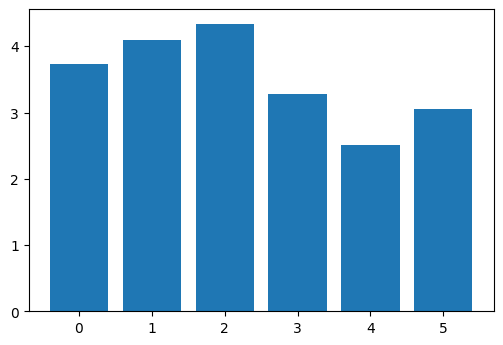

In [40]:

%matplotlib inline
import matplotlib.pyplot as plt

plt.bar(range(6), star_wars[star_wars.columns[9:15]].mean())

Rankings
So far, we've cleaned up the data, renamed several columns, and computed the average ranking of each movie. As I suspected, it looks like the "original" movies are rated much more highly than the newer ones.

In [41]:
star_wars[star_wars.columns[3:9]].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

<BarContainer object of 6 artists>

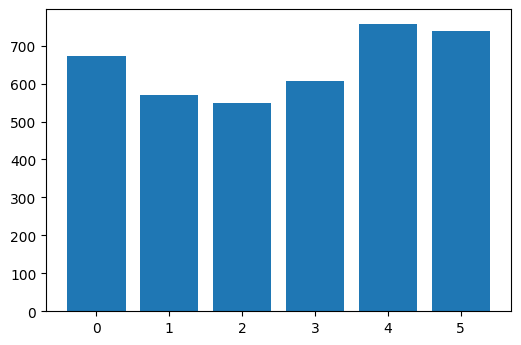

In [42]:
plt.bar(range(6), star_wars[star_wars.columns[3:9]].sum())


View counts
It appears that the original movies were seen by more respondents than the newer movies. This reinforces what we saw in the rankings, where the earlier movies seem to be more popular.

In [43]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

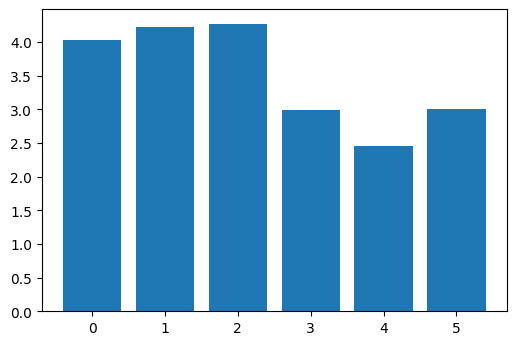

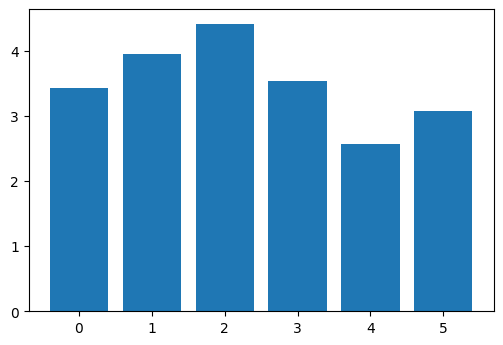

In [44]:
plt.bar(range(6), males[males.columns[9:15]].mean())
plt.show()

plt.bar(range(6), females[females.columns[9:15]].mean())
plt.show()

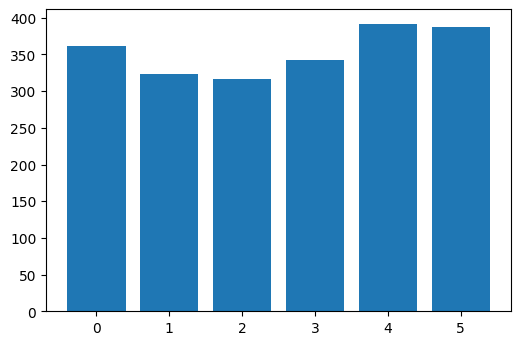

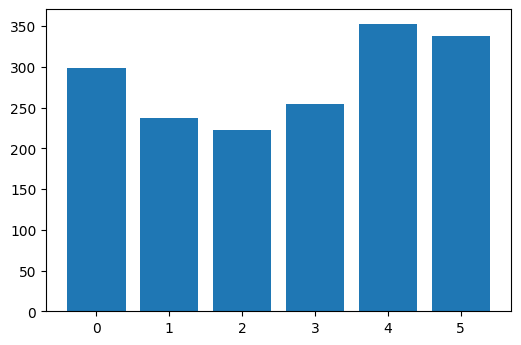

In [45]:
plt.bar(range(6), males[males.columns[3:9]].sum())
plt.show()

plt.bar(range(6), females[females.columns[3:9]].sum())
plt.show()